In [1]:
# import all required libraries
import pandas as pd
pd.set_option('display.max_rows', 150, 'display.max_columns', 150)
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
#read the csv file where all the data is available
df = pd.read_csv('../loan/loan.csv', error_bad_lines=False, index_col=False, dtype='unicode')


In [3]:
#checking on the first few recorsd to see how data looks
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [4]:
#Understand the metadata of the data
df.shape

(39717, 111)

In [5]:
#check the null percentage
percent_missing = df.isnull().sum() * 100 / len(df)

In [6]:
percent_missing.head()

id                0.00
member_id         0.00
loan_amnt         0.00
funded_amnt       0.00
funded_amnt_inv   0.00
dtype: float64

In [7]:
#using the percentage issing forming the missing data from data frame
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing.round(2)})
missing_value_df.sort_values('percent_missing', inplace=True)

In [8]:
#number of columns having complete null data
(missing_value_df['percent_missing'] == 100.00).sum()


54

In [9]:
print(df.shape)
print(df.info())
print(df.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB
None
id                                object
member_id                         object
loan_amnt                         object
funded_amnt                       object
funded_amnt_inv                   object
term                              object
int_rate                          object
installment                       object
grade                             object
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                        object
verification_status               object
issue_d                           object
loan_status                       object
pymnt_plan                        object
url                               object
desc                         

In [10]:
#Print the number of empty columns
print('Number of empty Columns:')
print(df.isnull().all(axis=0).sum())

Number of empty Columns:
54


In [11]:
#drop the columns that has complete null values which are not useful for analysis
missing_values_columns = missing_value_df[(missing_value_df['percent_missing'] == 100.00)].column_name.tolist()

null_columns_dropped_data = df.drop(missing_values_columns, axis=1)



In [12]:
null_columns_dropped_data.shape

(39717, 57)

In [13]:
null_columns_dropped_data = null_columns_dropped_data.drop(['desc', 'member_id', 'id', 'url', 'next_pymnt_d',
                                                           'mths_since_last_record', 'mths_since_last_delinq'], axis=1)
## Deleting column having all values as same. So not adding any importance in analysis
null_columns_dropped_data = null_columns_dropped_data.drop(['delinq_amnt', 'acc_now_delinq', 'application_type',
                                                           'policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths',
                                                           'tax_liens', 'collections_12_mths_ex_med', 'emp_title'], axis=1)


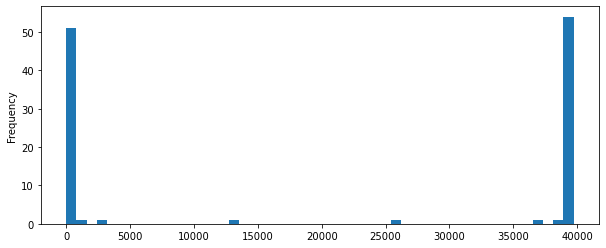

In [14]:
## Check percentage of missing data
((null_columns_dropped_data.isnull().sum() * 100 / len(null_columns_dropped_data)).sort_values(
    ascending=False)).head(11)

null_columns_dropped_data.shape

#Sample plot to check
c = df.isnull().sum()
c.plot(kind='hist', bins=50, figsize = (10,4))
plt.show()


In [15]:
#identify the categoral columns
df = []
for row in null_columns_dropped_data.columns.tolist():
    df.append({'column': row, 'count': len(null_columns_dropped_data[row].unique())})
unique = pd.DataFrame(df).sort_values('count')

In [17]:
unique.head(19)
# Start cleaning data
print(null_columns_dropped_data.columns.tolist())
null_columns_dropped_data['term'] = null_columns_dropped_data['term'].str.rstrip('months')

print(null_columns_dropped_data['term'])


['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies']
0         36 
1         60 
2         36 
3         36 
4         60 
         ... 
39712     36 
39713     36 
39714     36 
39715     36 
39716     36 
Name: term, Length: 39717, dtype: object


In [18]:

#the % symbol is stripped
null_columns_dropped_data['int_rate'] = null_columns_dropped_data['int_rate'].str.rstrip('%')
# the string years is removed so that we can work on numeric values 
null_columns_dropped_data['emp_length'] = null_columns_dropped_data['emp_length'].str.rstrip('years ')
null_columns_dropped_data['emp_length'] = null_columns_dropped_data['emp_length'].str.rstrip('year ')
null_columns_dropped_data['emp_length'].replace({'10+': '10'}, inplace=True)
null_columns_dropped_data['emp_length'][null_columns_dropped_data['emp_length'] == '< 1'] = '0.5'

print(null_columns_dropped_data['emp_length'])


0         10
1        0.5
2         10
3         10
4          1
        ... 
39712      4
39713      3
39714    0.5
39715    0.5
39716    0.5
Name: emp_length, Length: 39717, dtype: object


In [21]:
null_columns_dropped_data['revol_util'] = null_columns_dropped_data['revol_util'].str.rstrip('%')
null_columns_dropped_data.issue_d = pd.to_datetime(null_columns_dropped_data.issue_d, format='%b-%y')

null_columns_dropped_data['issue_d_month'] = null_columns_dropped_data['issue_d'].dt.month
null_columns_dropped_data['issue_d_year'] = null_columns_dropped_data['issue_d'].dt.year



In [22]:
null_columns_dropped_data.last_credit_pull_d = pd.to_datetime(null_columns_dropped_data.last_credit_pull_d, format='%b-%y')

null_columns_dropped_data['last_credit_pull_d_month'] = null_columns_dropped_data['last_credit_pull_d'].dt.month
null_columns_dropped_data['last_credit_pull_d_year'] = null_columns_dropped_data['last_credit_pull_d'].dt.year

null_columns_dropped_data.last_pymnt_d = pd.to_datetime(null_columns_dropped_data.last_pymnt_d, format='%b-%y')

null_columns_dropped_data['last_pymnt_d_month'] = null_columns_dropped_data['last_pymnt_d'].dt.month
null_columns_dropped_data['last_pymnt_d_year'] = null_columns_dropped_data['last_pymnt_d'].dt.year

null_columns_dropped_data.earliest_cr_line = pd.to_datetime(null_columns_dropped_data.earliest_cr_line, format='%b-%y')

null_columns_dropped_data['earliest_cr_line_month'] = null_columns_dropped_data['earliest_cr_line'].dt.month
null_columns_dropped_data['earliest_cr_line_year'] = null_columns_dropped_data['earliest_cr_line'].dt.year

null_columns_dropped_data.issue_d = pd.to_datetime(null_columns_dropped_data.issue_d, format='%b-%y')

null_columns_dropped_data['issue_d_month'] = null_columns_dropped_data['issue_d'].dt.month
null_columns_dropped_data['issue_d_year'] = null_columns_dropped_data['issue_d'].dt.year


In [25]:


#update column type to float to calculations
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'dti', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee']
null_columns_dropped_data[columns] = null_columns_dropped_data[columns].apply(pd.to_numeric)

In [26]:
# Creating a profit and loss column
null_columns_dropped_data['PnL']=(
    null_columns_dropped_data['total_pymnt']-null_columns_dropped_data['funded_amnt']
)*100/null_columns_dropped_data['funded_amnt']

In [27]:
numeric_data = null_columns_dropped_data.select_dtypes(include = [np.number])

categorical_data = null_columns_dropped_data.select_dtypes(exclude = [np.number, np.object])

string_data = null_columns_dropped_data.select_dtypes(include = [np.object])

print('There are {0} numerical , {1} categorical and {2} string features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1], string_data.shape[1]))

There are 25 numerical , 4 categorical and 20 string features in the training data


In [28]:
# getting final data set for analysis
df = null_columns_dropped_data

In [29]:
df["loan_status"].value_counts()


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

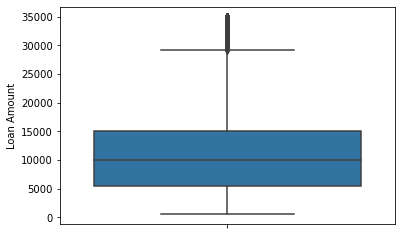

In [30]:
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

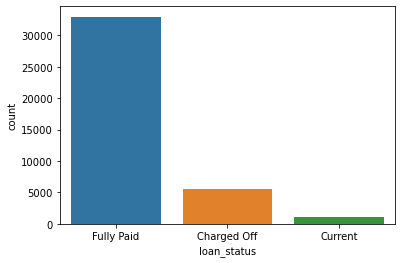

In [31]:
sns.countplot(x= null_columns_dropped_data["loan_status"])
plt.show()

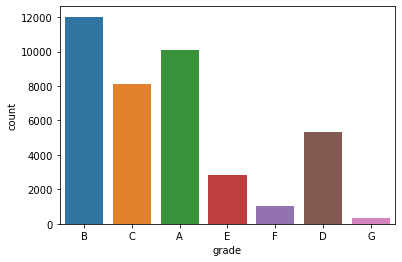

In [32]:
sns.countplot(x='grade', data=df)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


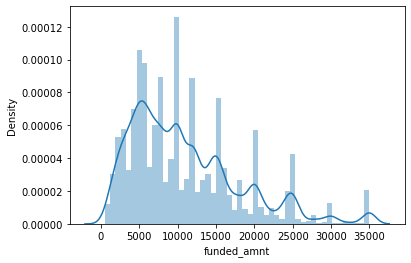

In [33]:
sns.distplot(df['funded_amnt'])
plt.show()

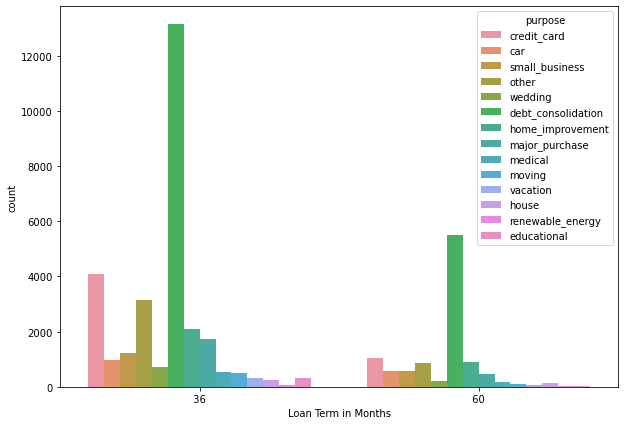

In [35]:
plt.figure(figsize=(10,7))
sns.countplot( x="term", hue='purpose', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

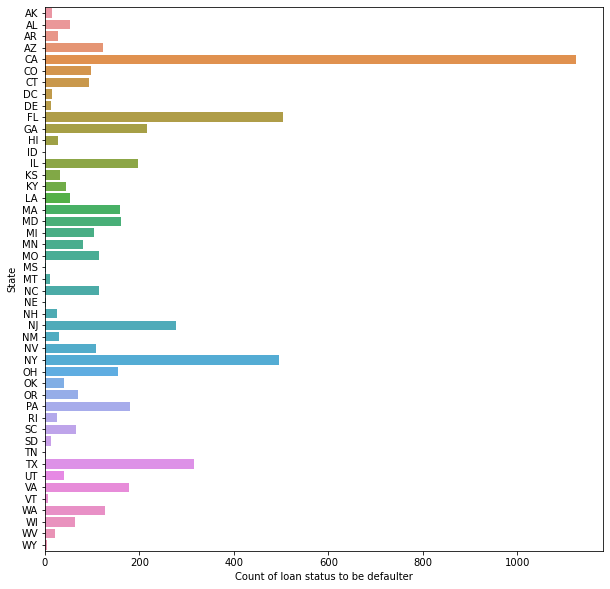

In [36]:
g = df[df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

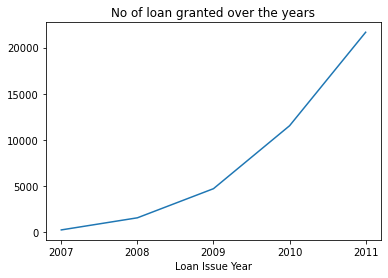

In [38]:
# Applicants from California state seem to hae high default %
g = df.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

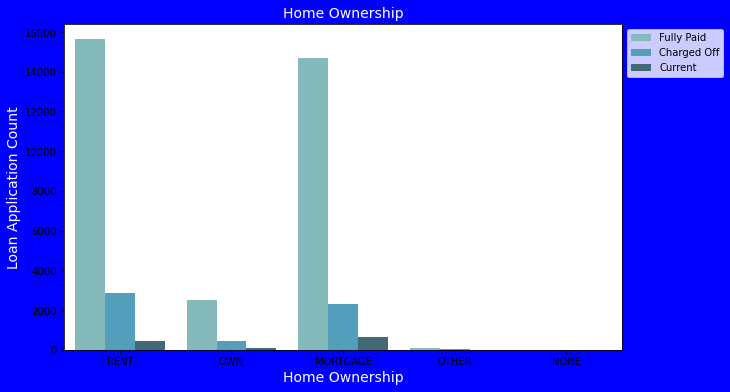

In [39]:
# The number of applicants seem to be exponentially increasing


plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=df,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()